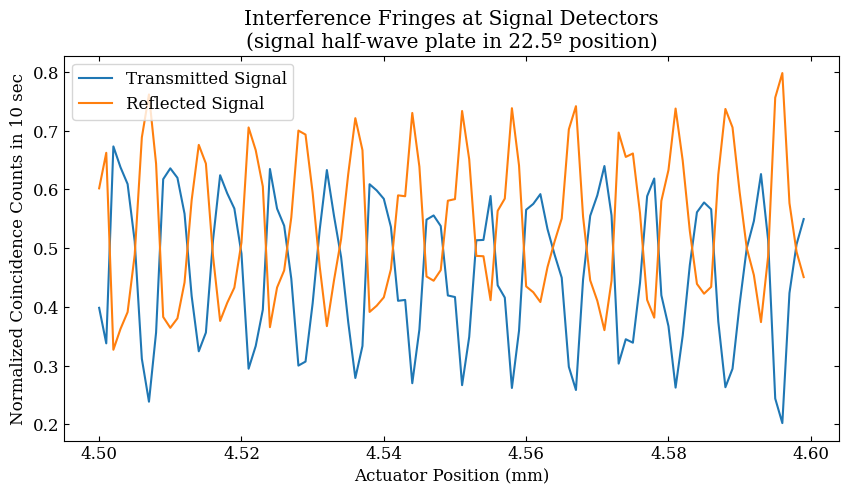

In [33]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# function to read the detector data in the weird format it gets saved in
def read_data(filename):
    with open(filename) as f:
        lines = f.readlines()
    vars = lines[2].strip().split("\t")
    vals = [[float(x) for x in l.split()] for l in lines[3:]]
    return pd.DataFrame(vals, columns=vars)

# read data
baseline = read_data('./raw-data/arsa_4.5-4.6-0.001-baseline.txt')
df = read_data('./raw-data/arsa_4.5-4.6-0.001-zeroed-idler.txt')

# normalize the detection counts
baseline[["GT", "GR", "G'T", "G'R"]] = baseline[["GT", "GR", "G'T", "G'R"]].div(baseline[["GT", "GR", "G'T", "G'R"]].sum(axis=1), axis=0)
df[["GT", "GR", "G'T", "G'R"]] = df[["GT", "GR", "G'T", "G'R"]].div(df[["GT", "GR", "G'T", "G'R"]].sum(axis=1), axis=0)

# aggregate by transmitted/reflected
baseline["T"] = baseline["GT"] + baseline["G'T"]
baseline["R"] = baseline["GR"] + baseline["G'R"]

# plot some of the data
fig = plt.figure(figsize=(10,5))
fig.tight_layout(pad=1)

# plot stuff
plt.plot(baseline['position'], baseline["GT"] + baseline["G'T"], label = "Transmitted Signal")
plt.plot(baseline['position'], baseline["GR"] + baseline["G'R"], label = "Reflected Signal")

# plot settings
plt.title('Interference Fringes at Signal Detectors\n(signal half-wave plate in 22.5º position)')
plt.xlabel('Actuator Position (mm)')
plt.ylabel('Normalized Coincidence Counts in 10 sec')
plt.legend()

# show plot
plt.show()

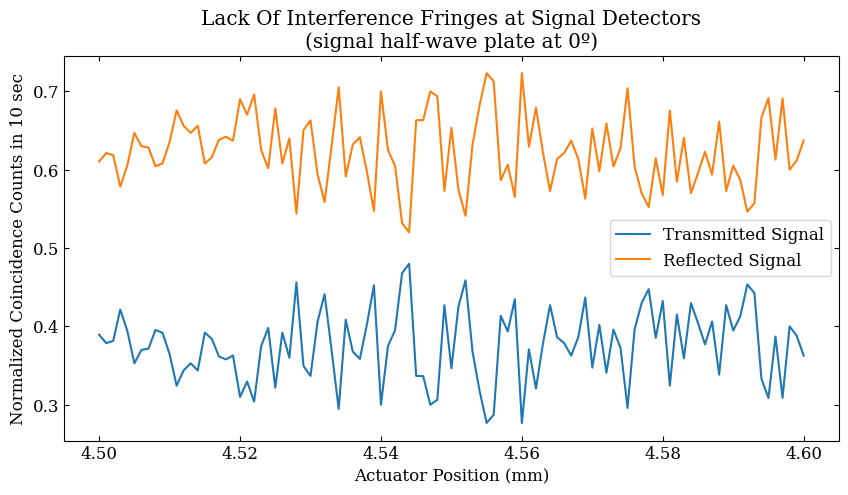

In [32]:
# plot some of the data
fig = plt.figure(figsize=(10,5))
fig.tight_layout(pad=1)

# plot stuff
plt.plot(df['position'], df["GT"] + df["G'T"], label = "Transmitted Signal")
plt.plot(df['position'], df["GR"] + df["G'R"], label = "Reflected Signal")

# plot settings
plt.title('Lack Of Interference Fringes at Signal Detectors\n(signal half-wave plate at 0º)')
plt.xlabel('Actuator Position (mm)')
plt.ylabel('Normalized Coincidence Counts in 10 sec')
plt.legend()

# show plot
plt.show()

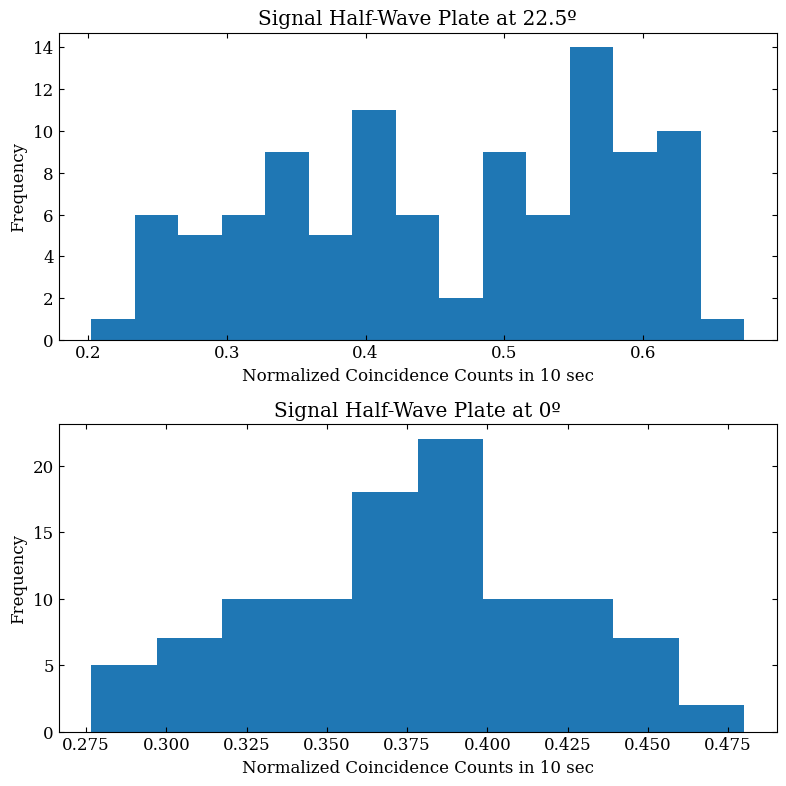

In [57]:
# plot histograms of data!

fig = plt.figure(figsize=(8,8))

ax0, ax1 = fig.subplots(2,1)
ax0.set_title('Signal Half-Wave Plate at 22.5º')
ax0.hist(baseline["G"], bins=15)
ax0.set_xlabel('Normalized Coincidence Counts in 10 sec')
ax0.set_ylabel('Frequency')

ax1.set_title('Signal Half-Wave Plate at 0º')
ax1.hist(df["G"], bins=10)
ax1.set_xlabel('Normalized Coincidence Counts in 10 sec')
ax1.set_ylabel('Frequency')

fig.tight_layout(pad=1)
plt.show()